In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
epileptic = pd.read_csv("Epileptic Seizure Recognition.csv", index_col='Unnamed')
epileptic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [3]:
# Select the independent variable and identify the dependent variables
X = epileptic.drop(columns='y')
y = epileptic.y

#Split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8050, 178) (8050,)
(3450, 178) (3450,)


Principal Component Analysis - Visualizing the PCA Transformation 

PCA aligns with axes, rotates data samples to be aligned with axes, shifts data samples so they have a mean of 0, no information is lost 

Dimension reduction 

    * More efficient storage and computation 
    * Remove less-informative "noise" features which cause problems for predictions tasks, e.g. classification, regression 

First step decorrelation - resulting PCA features are not linearly correlated

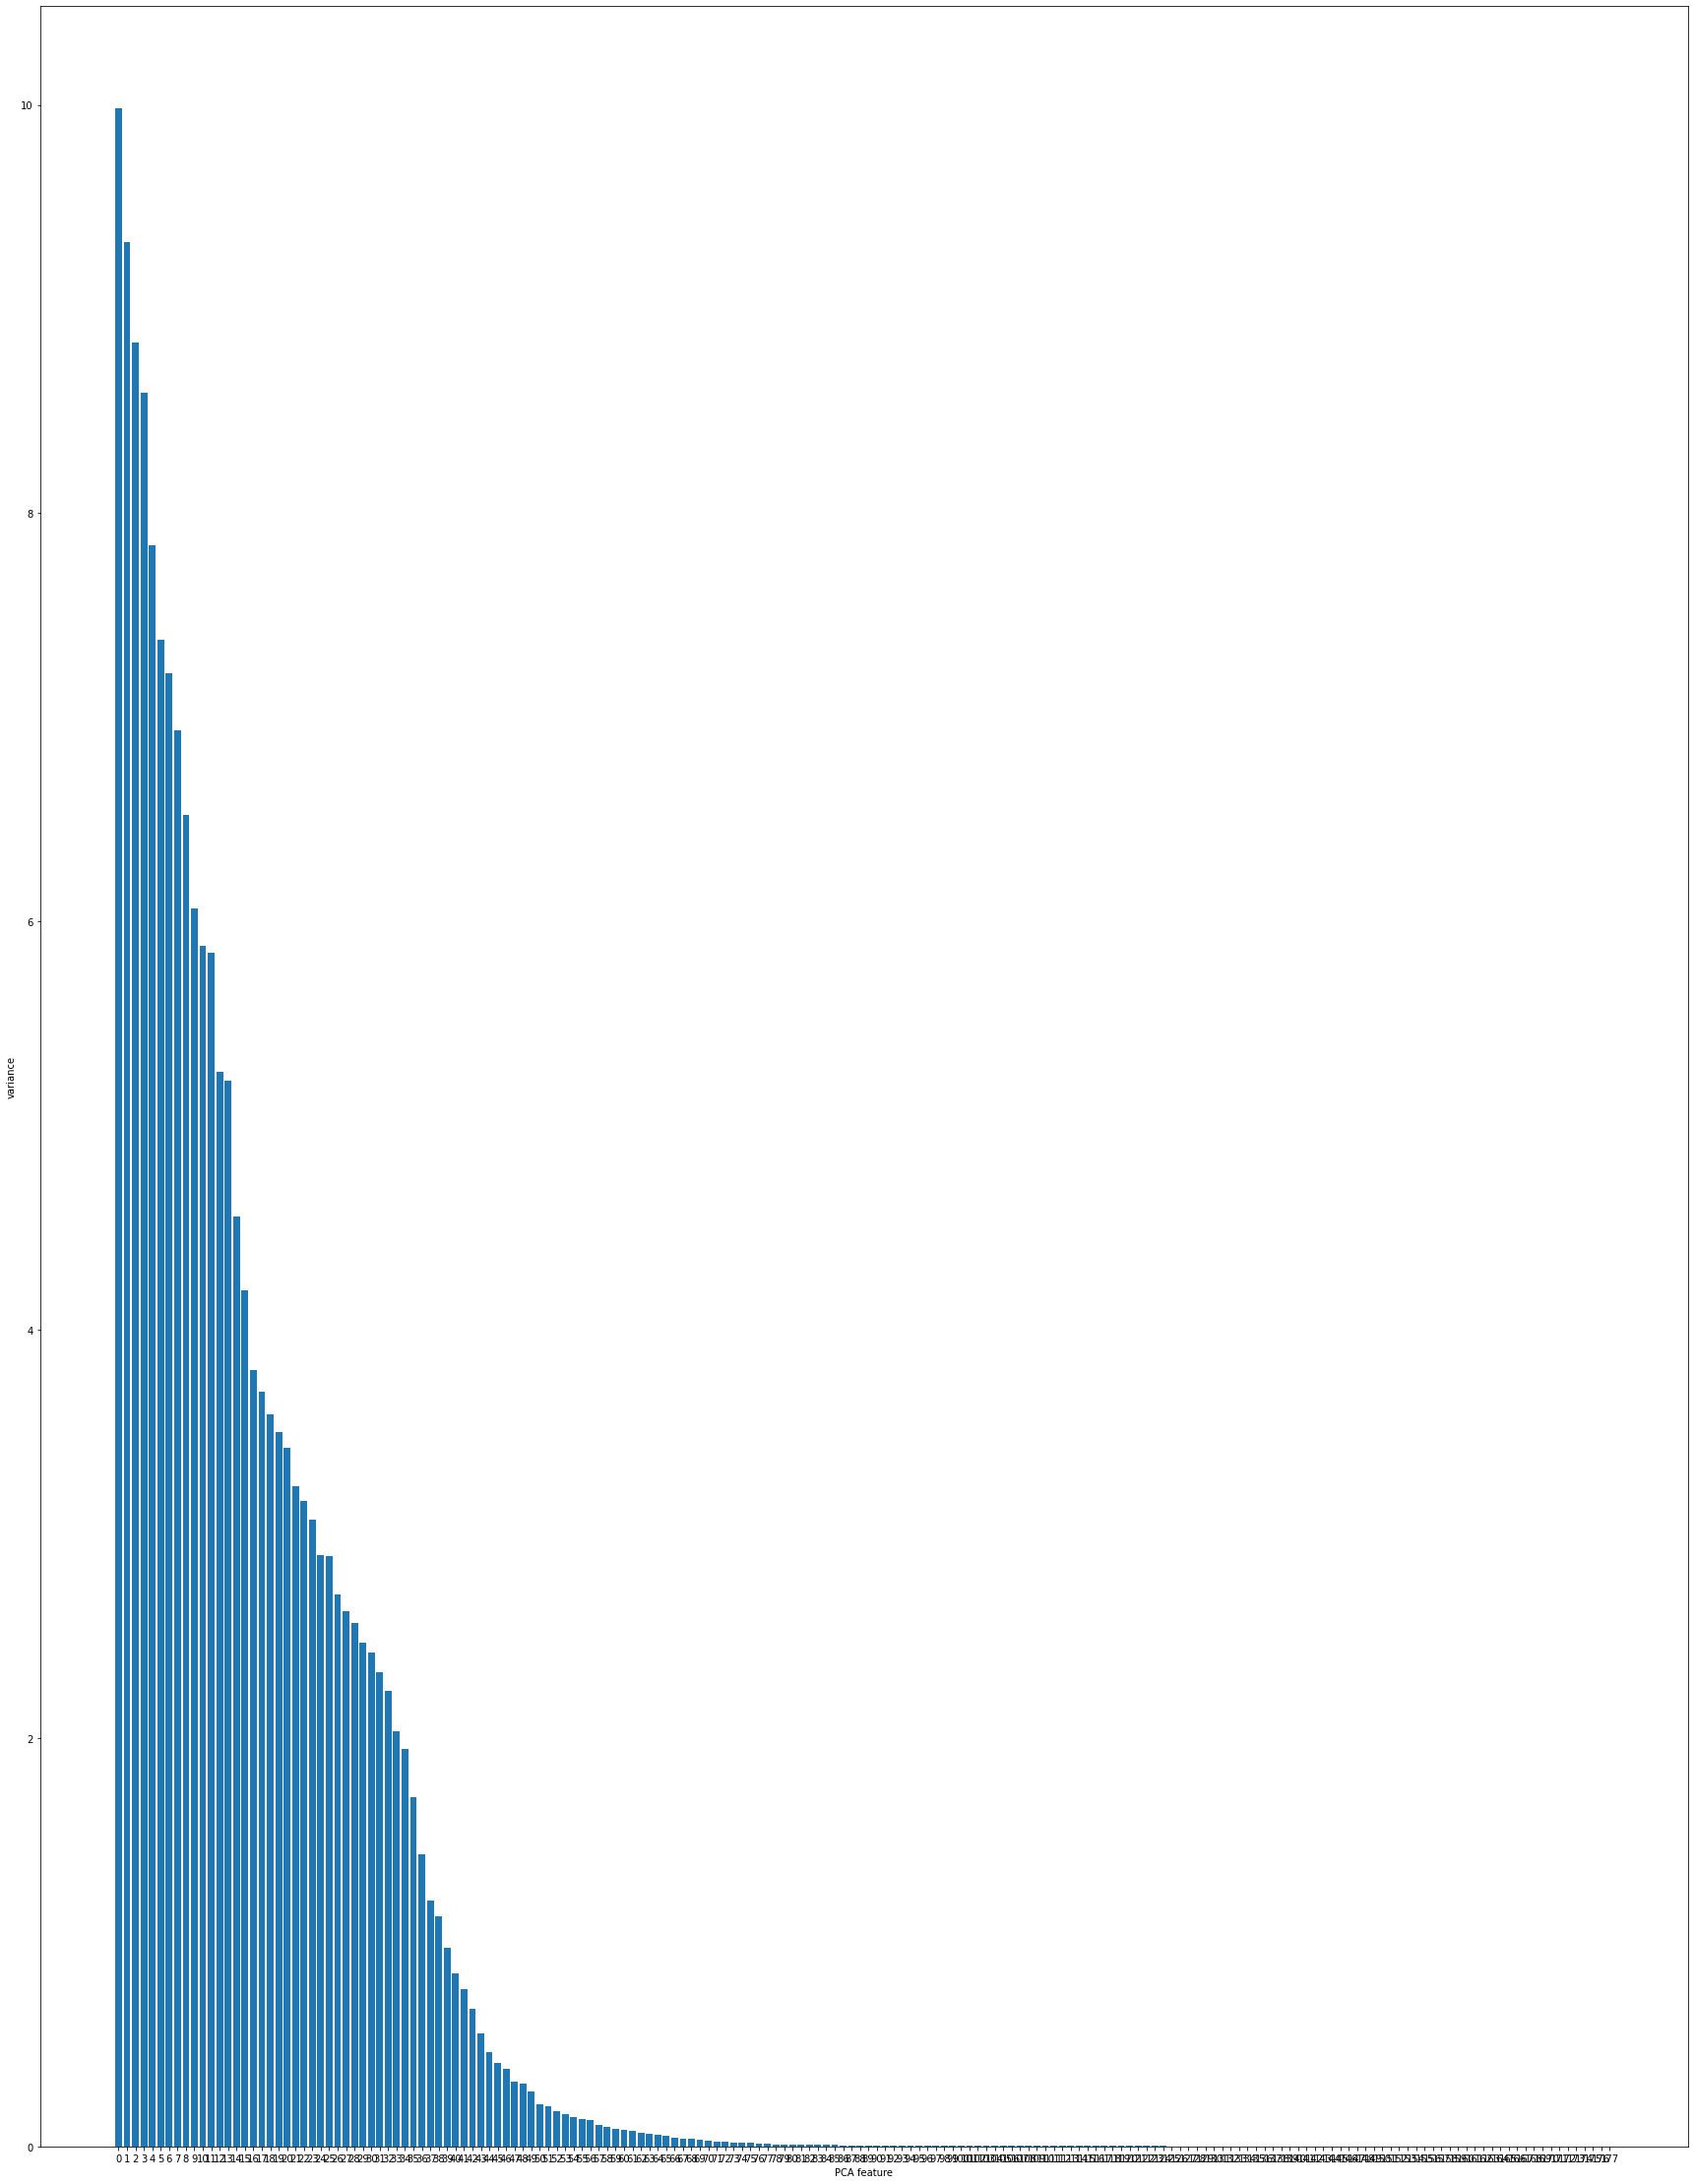

In [14]:
# Rows of transformed correspond to sampels 
# Colunms of transformed are the "PCA features"

# Create Scaler 
scaler = StandardScaler()

# Create PCA instance 
pca = PCA()

# Create pipeline
pipeline = make_pipeline(scaler, pca)

# Fit pipeline to samples 
pipeline.fit(X)

#Plot explained variance 
plt.figure(figsize=(30, 40))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [7]:
# Creating a random forest classifier 
clf = RandomForestClassifier(n_jobs=2, random_state=0, verbose=1)

# Training the classifier
clf.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   13.6s finished


RandomForestClassifier(n_jobs=2, random_state=0, verbose=1)

In [12]:
clf_test = clf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [11]:
clf.predict_proba(X_test)[0:10]
#These are predictions of the data

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


array([[0.07, 0.23, 0.14, 0.47, 0.09],
       [0.01, 0.22, 0.22, 0.21, 0.34],
       [0.18, 0.7 , 0.04, 0.06, 0.02],
       [0.02, 0.26, 0.24, 0.22, 0.26],
       [0.01, 0.2 , 0.16, 0.2 , 0.43],
       [0.01, 0.22, 0.42, 0.16, 0.19],
       [0.75, 0.05, 0.07, 0.11, 0.02],
       [0.04, 0.27, 0.33, 0.12, 0.24],
       [0.32, 0.26, 0.19, 0.19, 0.04],
       [0.  , 0.27, 0.35, 0.07, 0.31]])

In [15]:
# mapping names for the nodes for each predicted visual cue
preds= y[clf_test]

# View the prediction nodes for the first 5 observations
preds[0:25]

Unnamed
X20.V1.54     5
X14.V1.56     5
X8.V1.1       5
X8.V1.1       5
X14.V1.56     5
X16.V1.60     5
X15.V1.924    1
X16.V1.60     5
X15.V1.924    1
X16.V1.60     5
X16.V1.60     5
X20.V1.54     5
X16.V1.60     5
X8.V1.1       5
X16.V1.60     5
X16.V1.60     5
X15.V1.924    1
X16.V1.60     5
X14.V1.56     5
X20.V1.54     5
X16.V1.60     5
X16.V1.60     5
X15.V1.924    1
X20.V1.54     5
X20.V1.54     5
Name: y, dtype: int64

In [17]:
epileptic

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5


In [22]:
epileptic['Unnamed']

KeyError: 'Unnamed'

In [ ]:
#Try with different trees, change n_estimators in classifier 

#Try with "gini", "entropy"

#Try with different max depth

#class_weight, try to weight correlated nodes higher than the others 
